# Lab 4 - Kamil Pieprzycki 402037

In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


## TASK 1. Prior predictive checks
1.  Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3.    Check if samples are consistent with priors.
4.    Correct prior parameters to make them reasonably spreaded out.
5.    Check if observed data is possible to obtain using priors

In [3]:
model_ppc=CmdStanModel(stan_file='height_1_pcc.stan')

INFO:cmdstanpy:compiling stan file /home/lab4/height_1_pcc.stan to exe file /home/lab4/height_1_pcc
INFO:cmdstanpy:compiled model executable: /home/lab4/height_1_pcc


In [6]:
R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 1.0, 'Histogram of simulated height')

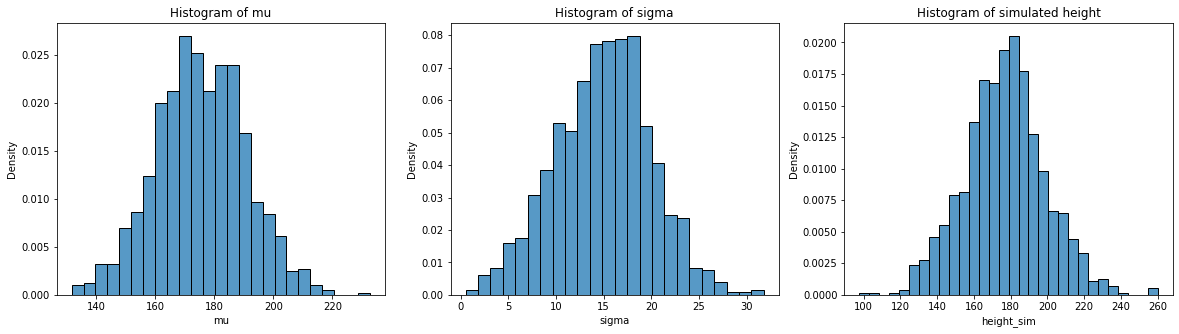

In [20]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.histplot(data=sim_pd['mu'], stat="density", ax=axs[0])
axs[0].set_title("Histogram of mu")
sns.histplot(data=sim_pd['sigma'], stat="density", ax=axs[1])
axs[1].set_title("Histogram of sigma")
sns.histplot(data=sim_pd['height_sim'], stat="density", ax=axs[2])
axs[2].set_title("Histogram of simulated height")

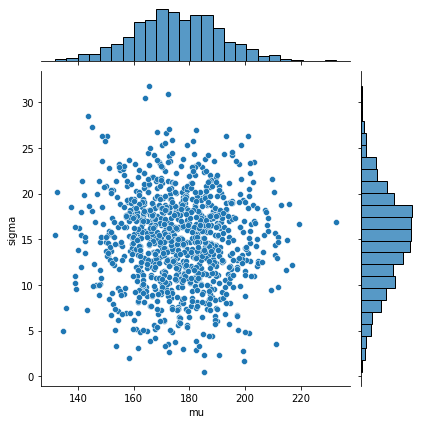

In [21]:
sns.jointplot(x = sim_pd['mu'], y = sim_pd['sigma'])
plt.show()

In [22]:


sim_df = sim.draws_pd()
sim_df.head()

sim_df.mean()

lp__               0.000000
accept_stat__      0.000000
mu               175.575269
sigma             14.909213
height_sim       176.689243
dtype: float64

## TASK 2 - Model fit and evaulation


In [24]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)



INFO:cmdstanpy:compiling stan file /home/lab4/height_1_fit.stan to exe file /home/lab4/height_1_fit
INFO:cmdstanpy:compiled model executable: /home/lab4/height_1_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab4/height_1_fit.hpp /home/lab4/height_1_fit.stan
Warning in '/home/lab4/height_1_fit.stan', line 3, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sund

INFO:cmdstanpy:CmdStan done processing.



1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.



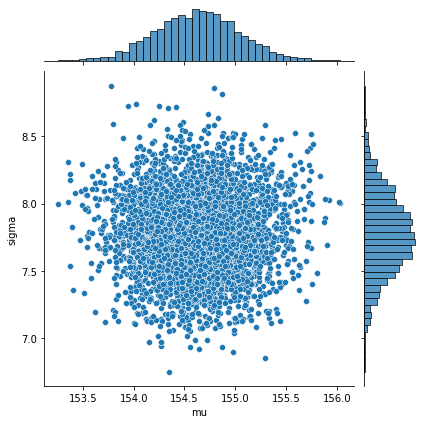

In [25]:
fit_pd = fit.draws_pd()

sns.jointplot(x = fit_pd['mu'], y = fit_pd['sigma'])
plt.show()

Text(0.5, 1.0, 'Histogram of simulated height')

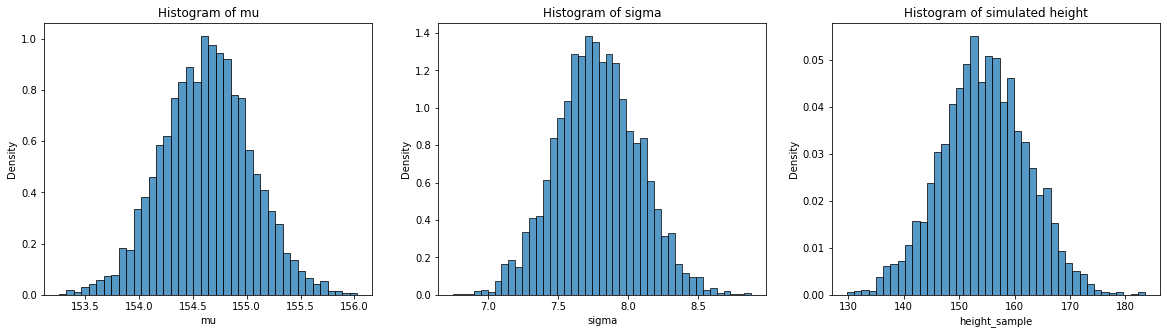

In [27]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.histplot(data=fit_pd['mu'], stat="density", ax=axs[0])
axs[0].set_title("Histogram of mu")
sns.histplot(data=fit_pd['sigma'], stat="density", ax=axs[1])
axs[1].set_title("Histogram of sigma")
sns.histplot(data=fit_pd['height_sample'], stat="density", ax=axs[2])
axs[2].set_title("Histogram of simulated height")

## TASK 3 - Adding predictor to the model - weight

Create column c_weight in the dataframe containing weights substrated by their mean.

In [34]:
d['c_weight'] = d['weight'] - d['weight'].mean()
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
data_sim

{'N': 50,
 'weight': array([-13.91943352, -13.26797358, -12.61651364, -11.9650537 ,
        -11.31359376, -10.66213383, -10.01067389,  -9.35921395,
         -8.70775401,  -8.05629407,  -7.40483413,  -6.75337419,
         -6.10191425,  -5.45045432,  -4.79899438,  -4.14753444,
         -3.4960745 ,  -2.84461456,  -2.19315462,  -1.54169468,
         -0.89023474,  -0.23877481,   0.41268513,   1.06414507,
          1.71560501,   2.36706495,   3.01852489,   3.66998483,
          4.32144477,   4.9729047 ,   5.62436464,   6.27582458,
          6.92728452,   7.57874446,   8.2302044 ,   8.88166434,
          9.53312428,  10.18458421,  10.83604415,  11.48750409,
         12.13896403,  12.79042397,  13.44188391,  14.09334385,
         14.74480379,  15.39626373,  16.04772366,  16.6991836 ,
         17.35064354,  18.00210348])}

## TASK 4 - Prior predictive checks
Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

In [37]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,alpha,beta_var,height_sample[1],height_sample[2],height_sample[3],height_sample[4],height_sample[5],height_sample[6],...,height_sample[41],height_sample[42],height_sample[43],height_sample[44],height_sample[45],height_sample[46],height_sample[47],height_sample[48],height_sample[49],height_sample[50]
0,0.0,0.0,215.623,0.777181,185.721,207.225,184.976,210.016,224.811,241.316,...,240.692,243.004,254.312,249.667,230.981,206.850,220.017,224.519,240.563,233.893
1,0.0,0.0,184.655,-1.198920,201.241,200.506,218.004,210.393,209.314,215.110,...,165.728,179.553,208.634,167.391,153.475,163.844,151.125,172.366,148.235,161.575
2,0.0,0.0,194.566,-0.075892,189.218,178.494,177.196,216.722,192.602,192.971,...,184.483,192.676,196.133,219.728,173.565,216.098,198.391,222.672,193.398,208.125
3,0.0,0.0,181.735,-0.039865,185.492,167.532,178.421,174.594,202.122,172.263,...,169.724,194.588,185.501,194.127,189.526,183.445,186.973,202.594,174.447,173.828
4,0.0,0.0,188.390,-0.478849,201.140,189.398,179.530,219.185,183.266,154.341,...,192.285,171.395,171.511,165.965,198.973,204.599,200.369,169.432,182.759,177.707


Maximum alpha value is:  221.805
Summary statistics appear to be correct. The maximum height of a human is 278 cm


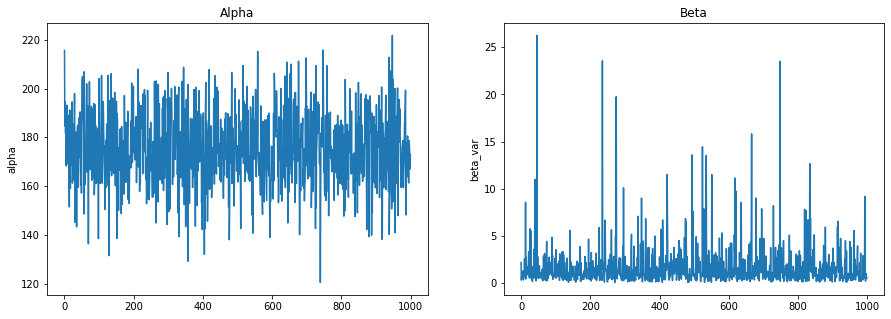

In [53]:
sim_pd = sim.draws_pd()
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.lineplot(data=sim_pd['alpha'],ax=ax[0])
ax[0].set_title('Alpha')
sns.lineplot(data=sim_pd['beta_var'],ax=ax[1])
ax[1].set_title('Beta')

print("Maximum alpha value is: ", max(sim_pd['alpha']))
print("Summary statistics appear to be correct. The maximum height of a human is 278 cm")

## TASK 5 - Modifying prior
If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.

In [42]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)



INFO:cmdstanpy:compiling stan file /home/lab4/height_2b_ppc.stan to exe file /home/lab4/height_2b_ppc
INFO:cmdstanpy:compiled model executable: /home/lab4/height_2b_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab4/height_2b_ppc.hpp /home/lab4/height_2b_ppc.stan
Warning in '/home/lab4/height_2b_ppc.stan', line 3, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab4/height_2b_ppc.stan', line 9, column 2: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored


INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 1.0, 'Beta')

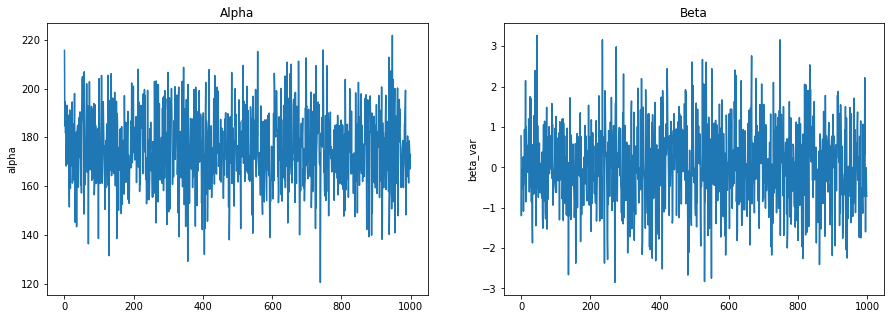

In [52]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.lineplot(data=sim_pd['alpha'],ax=ax[0])
ax[0].set_title('Alpha')
sns.lineplot(data=sim_pd['beta_var'],ax=ax[1])
ax[1].set_title('Beta')

In [54]:


parameters = []
for i in range(1,50):
    sample_parameters = []
    height_sample = 'height_sample['+ str(i)+']'
    data = sim_pd[height_sample]
    sample_parameters.append(max(data))
    sample_parameters.append(min(data))
    sample_parameters.append(data.quantile(0.05))
    sample_parameters.append(data.quantile(0.25))
    sample_parameters.append(data.quantile(0.5))
    sample_parameters.append(data.quantile(0.75))
    sample_parameters.append(data.quantile(0.95))
    parameters.append(sample_parameters)



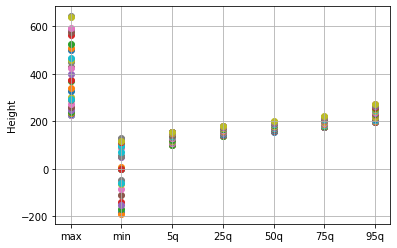

In [55]:
x = ['max', 'min', '5q', '25q', '50q', '75q', '95q']
for obj in parameters:
    plt.scatter(x,obj)
plt.ylabel("Height")
plt.grid()

## TASK 6 - Fitting and evaluating model
1. Create data_fit dictionary containing data from N first rows of dataframe
2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
3. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use errorbar from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.

